## Import modules

In [2]:
from __future__ import division

import os; os.chdir(os.path.join('..', '..'))
print os.getcwd()

/Users/eharkin/Documents/School/Grad work/Thesis/Experiments/GIF fitting/GIF fitting project/GIFFittingToolbox


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

from grr.CalciumGIF import CalciumGIF

## Run CaGIF out of the box

`CalciumGIF` is an `AugmentedGIF`-based class with a T-type calcium conductance according to Alexandre's implementation from 2017. The Ca current has hard-coded voltage-dependent kinetics.

In [5]:
cagif = CalciumGIF(0.1)
help(cagif)

Help on CalciumGIF in module src.CalciumGIF object:

class CalciumGIF(src.AugmentedGIF.AugmentedGIF)
 |  Method resolution order:
 |      CalciumGIF
 |      src.AugmentedGIF.AugmentedGIF
 |      src.GIF.GIF
 |      src.ThresholdModel.ThresholdModel
 |      src.SpikingModel.SpikingModel
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dt=0.1)
 |  
 |  computeGating(self, V, inf_vec, tau)
 |      Compute the state of a gate over time.
 |      
 |      Wrapper for _computeGatingInternal, which is a nb.jit-accelerated static method.
 |      
 |      tau can be a function or float.
 |  
 |  getDF_Ca(self, V)
 |  
 |  hInf(self, V)
 |      Compute the equilibrium state of the inactivation gate of the calcium conductance.
 |  
 |  mInf(self, V)
 |      Compute the equilibrium activation gate state of the calcium conductance.
 |  
 |  simulate(self, I, V0)
 |      Simulate the spiking response of the GIF model to an input current I (nA) with time step dt.
 |   

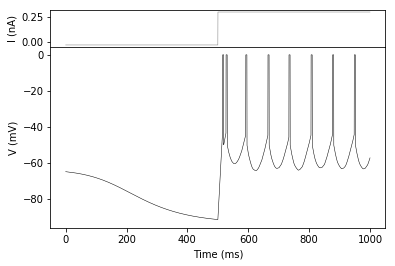

In [28]:
current_step = np.concatenate([
    -0.03 * np.ones(5000), 0.3 * np.ones(5000)
])

t, V, eta, V_T, spks = cagif.simulate(current_step, cagif.El)

spec = gs.GridSpec(2, 1, height_ratios = (0.2, 1), hspace = 0)

plt.figure()
plt.subplot(spec[0, :])
plt.plot(t, current_step, '-', color = 'gray', lw = 0.5)
plt.ylabel('I (nA)')
plt.subplot(spec[1, :])
plt.plot(t, V, 'k-', lw = 0.5)
plt.ylabel('V (mV)')
plt.xlabel('Time (ms)')
plt.show()

## Effect of varying Ca conductance magnitude

'Large', 'medium', and 'small' are somewhat arbitrary, since we don't actually have estimates for the magnitude of the conductance.

In [20]:
smallca = CalciumGIF(0.1)
smallca.gbar_K1 = 0.001

medca = CalciumGIF(0.1)
medca.gbar_K1 = 0.007

largeca = CalciumGIF(0.1)
largeca.gbar_K1 = 0.015

CaGIFs = [smallca, medca, largeca]

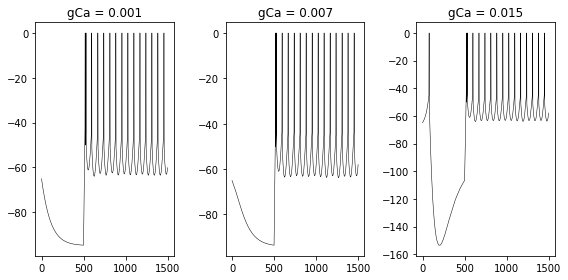

In [27]:
plt.figure(figsize = (8, 4))
for i, CaGIF_ in enumerate(CaGIFs):
    
    t, V, eta, V_T, spks = CaGIF_.simulate(current_step, CaGIF_.El)
    
    plt.subplot(1, len(CaGIFs), i + 1)
    plt.title('gCa = {:.3f}'.format(CaGIF_.gbar_K1))
    plt.plot(t, V, 'k-', lw = 0.5)

plt.tight_layout()
plt.show()